In [1]:
# 1. Import the necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler

In [3]:
# 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [4]:
customer_df = pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")

In [5]:
display(customer_df)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [6]:
customer_df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [7]:
# 3. First look at its main features (head, shape, info).

In [8]:
display(customer_df.head())
display(customer_df.shape)
display(customer_df.info())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

In [9]:
# 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [10]:
def to_snake_case(df):
    new_col = []
    for item in df.columns:
        new_col.append("_".join(item.lower().split(" ")))
    df.columns = new_col
    return df


In [11]:
customer_df = to_snake_case(customer_df)

In [12]:
display(customer_df)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [13]:
# 5. Change effective to date column to datetime format.

In [14]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [15]:
customer_df["effective_to_date"] = pd.to_datetime(customer_df["effective_to_date"] )

In [16]:
display(customer_df["effective_to_date"].dt.year)

0       2011
1       2011
2       2011
3       2011
4       2011
        ... 
9129    2011
9130    2011
9131    2011
9132    2011
9133    2011
Name: effective_to_date, Length: 9134, dtype: int64

In [17]:
display(customer_df["effective_to_date"])

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [18]:
# 8. Define a function that differentiates between continuous and discrete variables. 
# Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable 
# and do the same for discrete_df

In [19]:
customer_df_cat = customer_df.select_dtypes(include=[np.datetime64, np.object])

In [20]:
customer_df_num = customer_df.select_dtypes(np.number)

In [21]:
display(customer_df_cat)

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [22]:
display(customer_df_num)
display(customer_df_num.info())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


None

In [23]:
customer_df_num["monthly_premium_auto"].nunique()

202

In [24]:
customer_df_num["months_since_last_claim"].nunique()

36

In [25]:
customer_df_num["number_of_open_complaints"].nunique()

6

In [70]:
customer_df_num["number_of_policies"].nunique()

9

In [26]:
def dif_cont_dis(df):
    continous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()
    for col in df.columns:
        if df[col].nunique() < 100:
            discrete_df[col] = df[col]
        else:
            continous_df[col] = df[col]
    return continous_df, discrete_df
            
            
    

In [27]:
continous_df, discrete_df = dif_cont_dis(customer_df_num)

In [28]:
display(continous_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [29]:
display(discrete_df)

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1
...,...,...,...
9129,18,0,2
9130,14,0,1
9131,9,3,2
9132,34,0,3


In [30]:
# 7. Plot a correlation matrix, comment what you see.

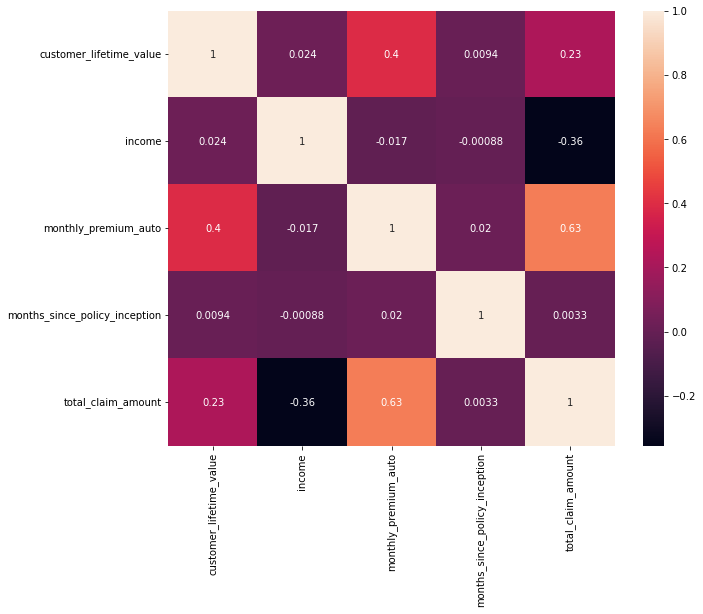

In [31]:
corr_matrix_cont=continous_df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix_cont, annot=True)
plt.show()

In [32]:
# the highest correlation with monthly premium auto and total_claim_amount

In [33]:
# 8. Create a function to plot every discrete variable. Do the same with the continuous variables 
# (Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [34]:
def plot_discrete_var(df):
    r = math.ceil(df.shape[1]/2)
    c = 2
    fig, ax = plt.subplots(r,c, figsize=(15,20))
    i = 0
    j = 0
    for item in df.columns:
        sns.histplot(x=item, data = df, ax = ax[i, j])
        if j == 0:
            j = 1
        elif j == 1:
            j = 0
            i = i + 1
    plt.show()

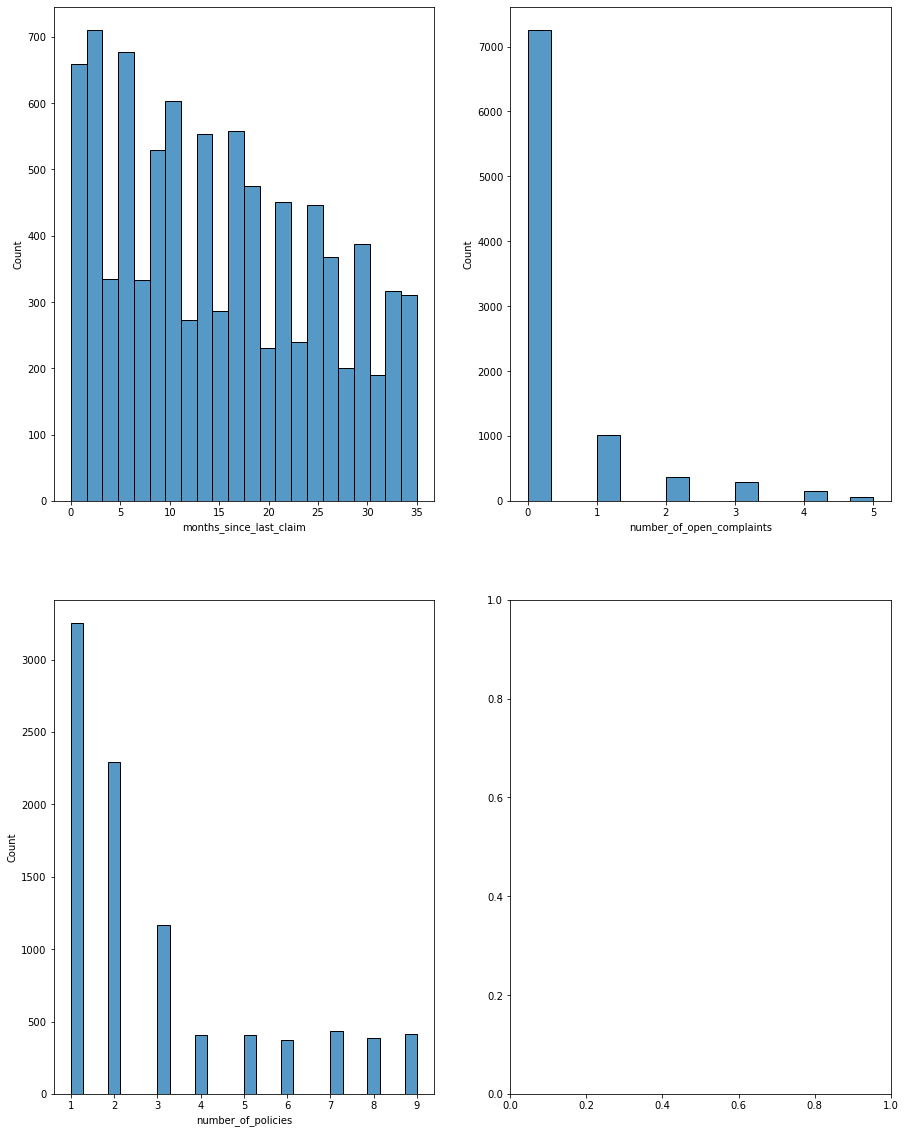

In [35]:
plot_discrete_var(discrete_df)

In [36]:
def plot_continous_var(df):

    for item in df.columns:
        sns.displot(x=item, data = df)

    plt.show()

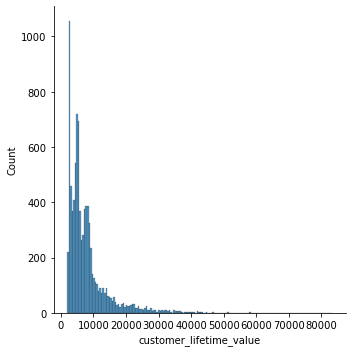

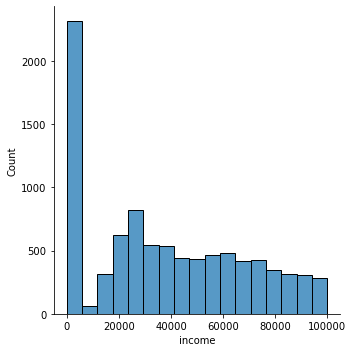

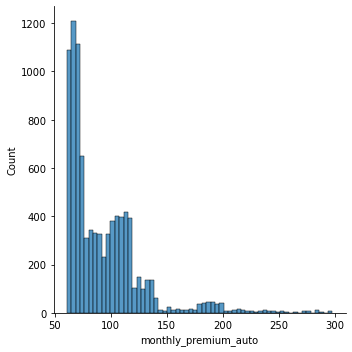

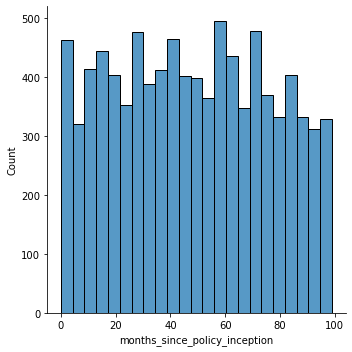

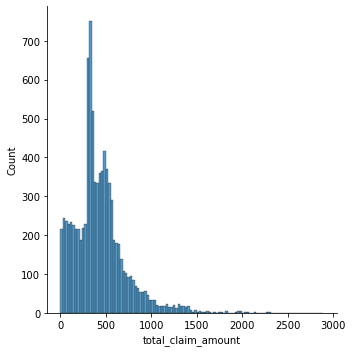

In [37]:
plot_continous_var(continous_df)

In [38]:
# 9. Comment what you see in the plots.
# customer-lifetime-value and monthly-premium-auto positively skewed

In [39]:
# 10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

In [40]:
def log_transform_clean(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN


In [41]:
def boxplot_continous_var(df, log = True):

    for item in df.columns:
        sns.boxplot(x=item, data=df)
        plt.show()
        if log == True:
            df1 = df[item].apply(log_transform_clean)
            df1 = pd.DataFrame(df1)
            sns.boxplot(x=item, data=df1)
            plt.show()

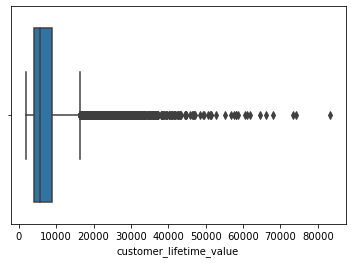

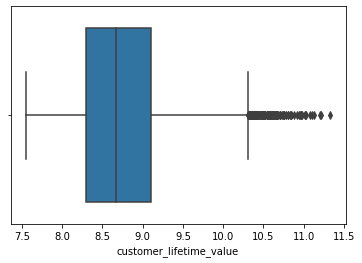

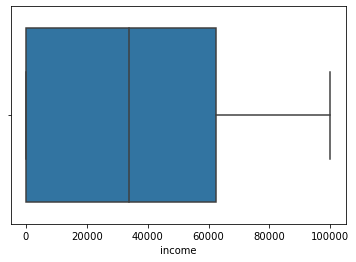

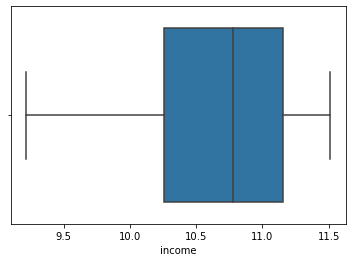

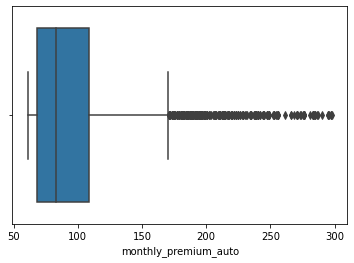

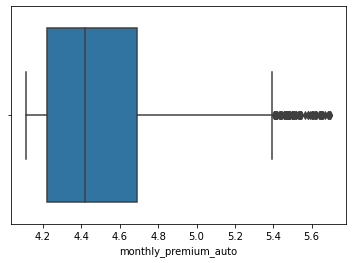

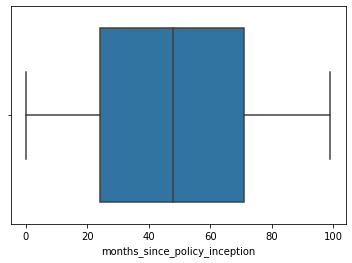

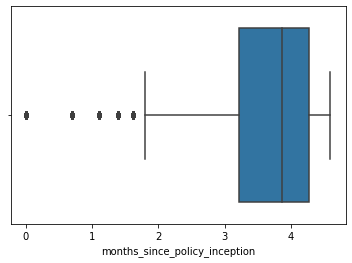

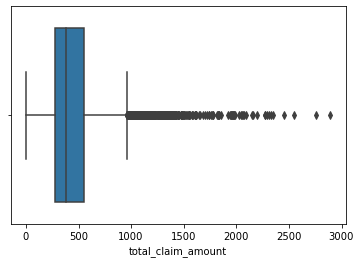

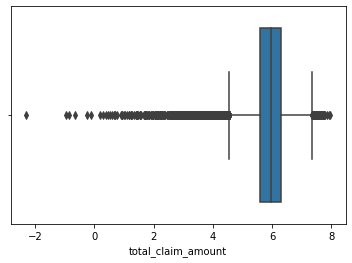

In [42]:
boxplot_continous_var(continous_df)

In [43]:
continous_df["customer_lifetime_value"] = continous_df["customer_lifetime_value"].apply(log_transform_clean)

In [44]:
continous_df["monthly_premium_auto"] = continous_df["monthly_premium_auto"].apply(log_transform_clean)

In [45]:
display(continous_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,7.924260,56274,4.234107,5,384.811147
1,8.850738,0,4.543295,42,1131.464935
2,9.464008,48767,4.682131,38,566.472247
3,8.941920,0,4.663439,65,529.881344
4,7.942253,43836,4.290459,44,138.130879
...,...,...,...,...,...
9129,10.060747,71941,4.290459,89,198.234764
9130,8.038031,21604,4.369448,28,379.200000
9131,9.007476,0,4.442651,37,790.784983
9132,8.925912,21941,4.564348,3,691.200000


In [46]:
X = continous_df.drop(columns=["total_claim_amount"])
y = continous_df["total_claim_amount"]

In [47]:
scaler = MinMaxScaler()
scaler.fit(X) # Remember that at this point X_income contains the numerical feature except ['INCOME','TIMELAG','AVGGIFT']
X_normalized_continous_np = scaler.transform(X)
X_normalized_continous_df = pd.DataFrame(X_normalized_continous_np, columns=X.columns)
X_normalized_continous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception
0,0.099340,0.562847,0.077690,0.050505
1,0.344314,0.000000,0.272611,0.424242
2,0.506471,0.487763,0.360138,0.383838
3,0.368424,0.000000,0.348354,0.656566
4,0.104098,0.438443,0.113216,0.444444
...,...,...,...,...
9129,0.664257,0.719547,0.113216,0.898990
9130,0.129423,0.216081,0.163013,0.282828
9131,0.385758,0.000000,0.209162,0.373737
9132,0.364191,0.219452,0.285884,0.030303


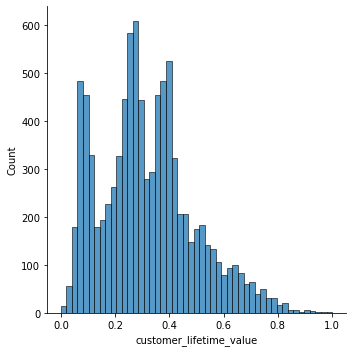

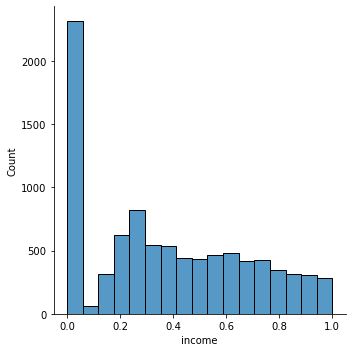

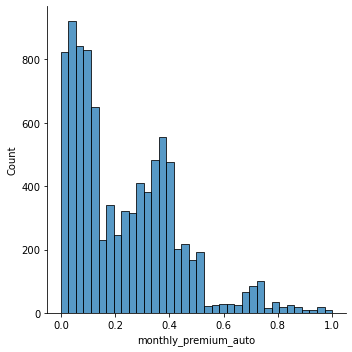

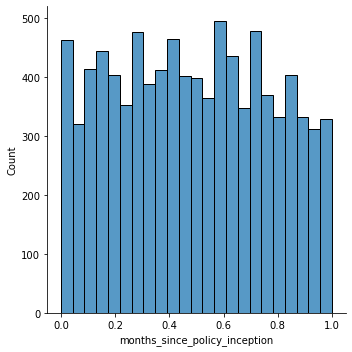

In [48]:
plot_continous_var(X_normalized_continous_df)

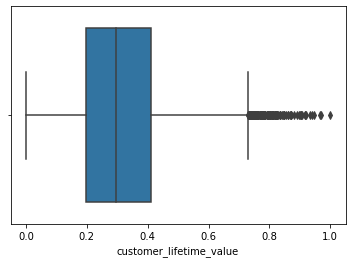

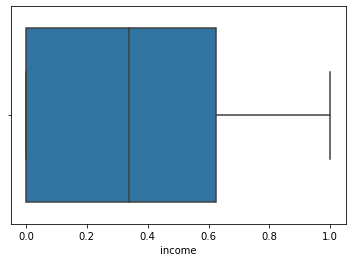

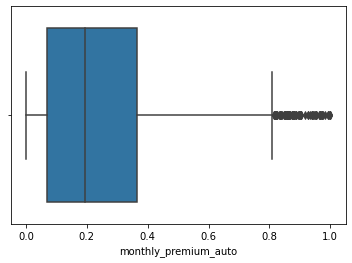

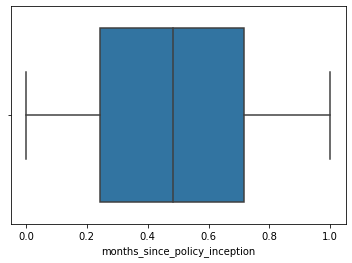

In [49]:
boxplot_continous_var(X_normalized_continous_df, log=False)

In [50]:
X_normalized_continous_df.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_policy_inception    0
dtype: int64

In [51]:
display(X_normalized_continous_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception
0,0.099340,0.562847,0.077690,0.050505
1,0.344314,0.000000,0.272611,0.424242
2,0.506471,0.487763,0.360138,0.383838
3,0.368424,0.000000,0.348354,0.656566
4,0.104098,0.438443,0.113216,0.444444
...,...,...,...,...
9129,0.664257,0.719547,0.113216,0.898990
9130,0.129423,0.216081,0.163013,0.282828
9131,0.385758,0.000000,0.209162,0.373737
9132,0.364191,0.219452,0.285884,0.030303


In [52]:
# 11. Did you find outliers? Comment what you will do with them. -> remove them

In [53]:

iqr = np.nanpercentile(X_normalized_continous_df['customer_lifetime_value'],75) - np.nanpercentile(X_normalized_continous_df['customer_lifetime_value'],25)
upper_limit = np.nanpercentile(X_normalized_continous_df['customer_lifetime_value'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = X_normalized_continous_df[X_normalized_continous_df['customer_lifetime_value'] > upper_limit]
len(extraordinary_points)

X_normalized_continous_df[X_normalized_continous_df['customer_lifetime_value'] < upper_limit]

0.7309568105040039


,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception
0,0.099340,0.562847,0.077690,0.050505
1,0.344314,0.000000,0.272611,0.424242
2,0.506471,0.487763,0.360138,0.383838
3,0.368424,0.000000,0.348354,0.656566
4,0.104098,0.438443,0.113216,0.444444
...,...,...,...,...
9129,0.664257,0.719547,0.113216,0.898990
9130,0.129423,0.216081,0.163013,0.282828
9131,0.385758,0.000000,0.209162,0.373737
9132,0.364191,0.219452,0.285884,0.030303


In [54]:

iqr = np.nanpercentile(X_normalized_continous_df['monthly_premium_auto'],75) - np.nanpercentile(X_normalized_continous_df['monthly_premium_auto'],25)
upper_limit = np.nanpercentile(X_normalized_continous_df['monthly_premium_auto'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = X_normalized_continous_df[X_normalized_continous_df['monthly_premium_auto'] > upper_limit]
len(extraordinary_points) 

0.8121411849270901


106

In [55]:
# 12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [56]:
X_normalized_continous_df.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_policy_inception    0
dtype: int64

In [57]:
display(X_normalized_continous_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception
0,0.099340,0.562847,0.077690,0.050505
1,0.344314,0.000000,0.272611,0.424242
2,0.506471,0.487763,0.360138,0.383838
3,0.368424,0.000000,0.348354,0.656566
4,0.104098,0.438443,0.113216,0.444444
...,...,...,...,...
9129,0.664257,0.719547,0.113216,0.898990
9130,0.129423,0.216081,0.163013,0.282828
9131,0.385758,0.000000,0.209162,0.373737
9132,0.364191,0.219452,0.285884,0.030303


In [58]:
X_final = pd.concat([X_normalized_continous_df, discrete_df, customer_df_cat ], axis=1)

In [59]:
display(X_final)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,customer,state,response,...,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,0.099340,0.562847,0.077690,0.050505,32,0,1,BU79786,Washington,No,...,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,0.344314,0.000000,0.272611,0.424242,13,0,8,QZ44356,Arizona,No,...,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,0.506471,0.487763,0.360138,0.383838,18,0,2,AI49188,Nevada,No,...,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,0.368424,0.000000,0.348354,0.656566,18,0,7,WW63253,California,No,...,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,0.104098,0.438443,0.113216,0.444444,12,0,1,HB64268,Washington,No,...,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.664257,0.719547,0.113216,0.898990,18,0,2,LA72316,California,No,...,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,0.129423,0.216081,0.163013,0.282828,14,0,1,PK87824,California,Yes,...,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,0.385758,0.000000,0.209162,0.373737,9,3,2,TD14365,California,No,...,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,0.364191,0.219452,0.285884,0.030303,34,0,3,UP19263,California,No,...,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [60]:
X_final.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_policy_inception    0
months_since_last_claim          0
number_of_open_complaints        0
number_of_policies               0
customer                         0
state                            0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
location_code                    0
marital_status                   0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
vehicle_class                    0
vehicle_size                     0
dtype: int64